Model Accuracy: 99.52%


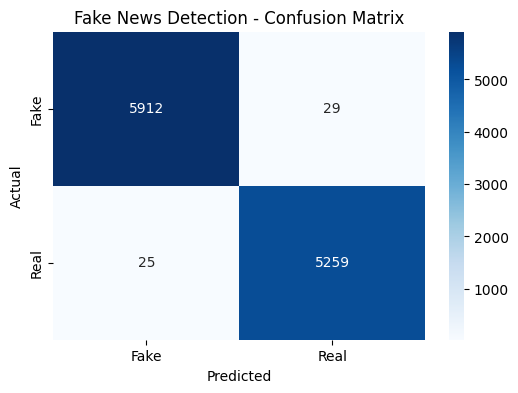

In [ ]:
# Step 1: Install required libraries
!pip install pandas scikit-learn matplotlib seaborn

# Step 2: Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 3: Load the datasets (make sure to upload them first)
true_df = pd.read_csv('/content/True.csv')
fake_df = pd.read_csv('/content/Fake.csv')

# Step 4: Add labels: 1 for real news, 0 for fake news
true_df['label'] = 1
fake_df['label'] = 0

# Step 5: Combine datasets and shuffle
df = pd.concat([true_df, fake_df], axis=0).sample(frac=1).reset_index(drop=True)

# Step 6: Drop unnecessary columns
if 'date' in df.columns:
    df.drop(columns=['date'], inplace=True)
if 'subject' in df.columns:
    df.drop(columns=['subject'], inplace=True)

# Step 7: Combine title and text into a single feature
df['text'] = df['title'] + " " + df['text']
df = df[['text', 'label']]  # Keep only necessary columns

# Step 8: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.25, random_state=42)

# Step 9: TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 10: Train PassiveAggressiveClassifier
model = PassiveAggressiveClassifier(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Step 11: Make predictions
y_pred = model.predict(X_test_tfidf)

# Step 12: Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy*100:.2f}%")

# Step 13: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Fake News Detection - Confusion Matrix')
plt.show()